<a href="https://colab.research.google.com/github/Zesmat/Market-Price-Prediction/blob/main/Market_price2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data preprocessing

In [90]:
df=pd.read_csv('/content/MarketPricePrediction (1).csv')
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10227 entries, 0 to 10226
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   market    10227 non-null  object
 1   month     10227 non-null  object
 2   year      10227 non-null  int64 
 3   quantity  10227 non-null  int64 
 4   priceMin  10227 non-null  int64 
 5   priceMax  10227 non-null  int64 
 6   priceMod  10227 non-null  int64 
 7   state     10227 non-null  object
 8   city      10227 non-null  object
 9   date      10227 non-null  object
dtypes: int64(5), object(5)
memory usage: 799.1+ KB


,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,Jan-05
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,Jan-06
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,Jan-10
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,Jan-11
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,Jan-12


### Convert date-time format

In [91]:
df['date_string'] = df['date'].astype(str) + '-' + df['year'].astype(str)#Jan-05-202
df['datetime'] = pd.to_datetime(df['date_string'], errors='coerce')
df = df.drop(['date_string', 'month', 'year', 'date'], axis=1)#delete(drop) unwanted columns
df

,market,quantity,priceMin,priceMax,priceMod,state,city,datetime
0,ABOHAR(PB),2350,404,493,446,PB,ABOHAR,2005-01-05
1,ABOHAR(PB),900,487,638,563,PB,ABOHAR,2006-01-06
2,ABOHAR(PB),790,1283,1592,1460,PB,ABOHAR,2010-01-10
3,ABOHAR(PB),245,3067,3750,3433,PB,ABOHAR,2011-01-11
4,ABOHAR(PB),1035,523,686,605,PB,ABOHAR,2012-01-12
...,...,...,...,...,...,...,...,...
10222,YEOLA(MS),131326,282,612,526,MS,YEOLA,2011-12-11
10223,YEOLA(MS),207066,485,1327,1136,MS,YEOLA,2012-12-12
10224,YEOLA(MS),215883,472,1427,1177,MS,YEOLA,2013-12-13
10225,YEOLA(MS),201077,446,1654,1456,MS,YEOLA,2014-12-14


In [92]:
df = df.sort_values('datetime')
df['datetime'] = df['datetime'].interpolate()
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Index: 10227 entries, 6061 to 9398
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   market    10227 non-null  object        
 1   quantity  10227 non-null  int64         
 2   priceMin  10227 non-null  int64         
 3   priceMax  10227 non-null  int64         
 4   priceMod  10227 non-null  int64         
 5   state     10227 non-null  object        
 6   city      10227 non-null  object        
 7   datetime  10227 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 719.1+ KB


,market,quantity,priceMin,priceMax,priceMod,state,city,datetime
6061,MAHUVA(GUJ),31094,294,508,454,GUJ,MAHUVA,2001-01-01
6436,MANMAD(MS),151765,248,519,463,MS,MANMAD,2001-01-01
5404,LASALGAON(MS),295435,219,545,494,MS,LASALGAON,2001-01-01
8614,SAIKHEDA(MS),25424,293,528,473,MS,SAIKHEDA,2001-01-01
1579,CHAKAN(MS),76267,239,562,441,MS,CHAKAN,2001-01-01
...,...,...,...,...,...,...,...,...
9380,SINNAR(MS),21367,115,739,637,MS,SINNAR,2016-02-16
9395,SINNAR(MS),12228,143,1003,708,MS,SINNAR,2016-02-16
9396,SINNAR(MS),15600,219,1219,1013,MS,SINNAR,2016-02-16
9397,SINNAR(MS),51425,98,323,281,MS,SINNAR,2016-02-16


### Handling Categrical Values(label)

In [93]:
from sklearn.preprocessing import LabelEncoder
df['city']=LabelEncoder().fit_transform(df['city'])
df['state']=LabelEncoder().fit_transform(df['state'])
df['market']=LabelEncoder().fit_transform(df['market'])
df.info()
df

<class 'pandas.core.frame.DataFrame'>
Index: 10227 entries, 6061 to 9398
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   market    10227 non-null  int64         
 1   quantity  10227 non-null  int64         
 2   priceMin  10227 non-null  int64         
 3   priceMax  10227 non-null  int64         
 4   priceMod  10227 non-null  int64         
 5   state     10227 non-null  int64         
 6   city      10227 non-null  int64         
 7   datetime  10227 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(7)
memory usage: 719.1 KB


,market,quantity,priceMin,priceMax,priceMod,state,city,datetime
6061,73,31094,294,508,454,5,70,2001-01-01
6436,76,151765,248,519,463,14,73,2001-01-01
5404,68,295435,219,545,494,14,65,2001-01-01
8614,101,25424,293,528,473,14,98,2001-01-01
1579,21,76267,239,562,441,14,21,2001-01-01
...,...,...,...,...,...,...,...,...
9380,108,21367,115,739,637,14,105,2016-02-16
9395,108,12228,143,1003,708,14,105,2016-02-16
9396,108,15600,219,1219,1013,14,105,2016-02-16
9397,108,51425,98,323,281,14,105,2016-02-16


### Normalization(standrizattion)

In [94]:
from sklearn.preprocessing import MinMaxScaler
numeric_cols = ['quantity','priceMin', 'priceMax', 'priceMod']
df_scaled = df.copy()  # Start with a copy of the original DataFrame

scaler = MinMaxScaler()
df_scaled[numeric_cols] = scaler.fit_transform(df_scaled[numeric_cols])

df_scaled


,market,quantity,priceMin,priceMax,priceMod,state,city,datetime
6061,73,0.018959,0.046457,0.045110,0.059177,5,70,2001-01-01
6436,76,0.092583,0.038770,0.046477,0.060601,14,73,2001-01-01
5404,68,0.180240,0.033924,0.049708,0.065506,14,65,2001-01-01
8614,101,0.015500,0.046290,0.047595,0.062184,14,98,2001-01-01
1579,21,0.046520,0.037266,0.051821,0.057120,14,21,2001-01-01
...,...,...,...,...,...,...,...,...
9380,108,0.013024,0.016544,0.073816,0.088133,14,105,2016-02-16
9395,108,0.007448,0.021223,0.106624,0.099367,14,105,2016-02-16
9396,108,0.009506,0.033924,0.133466,0.147627,14,105,2016-02-16
9397,108,0.031363,0.013703,0.022120,0.031804,14,105,2016-02-16


## 2. Exploratory Data Analysis (EDA)


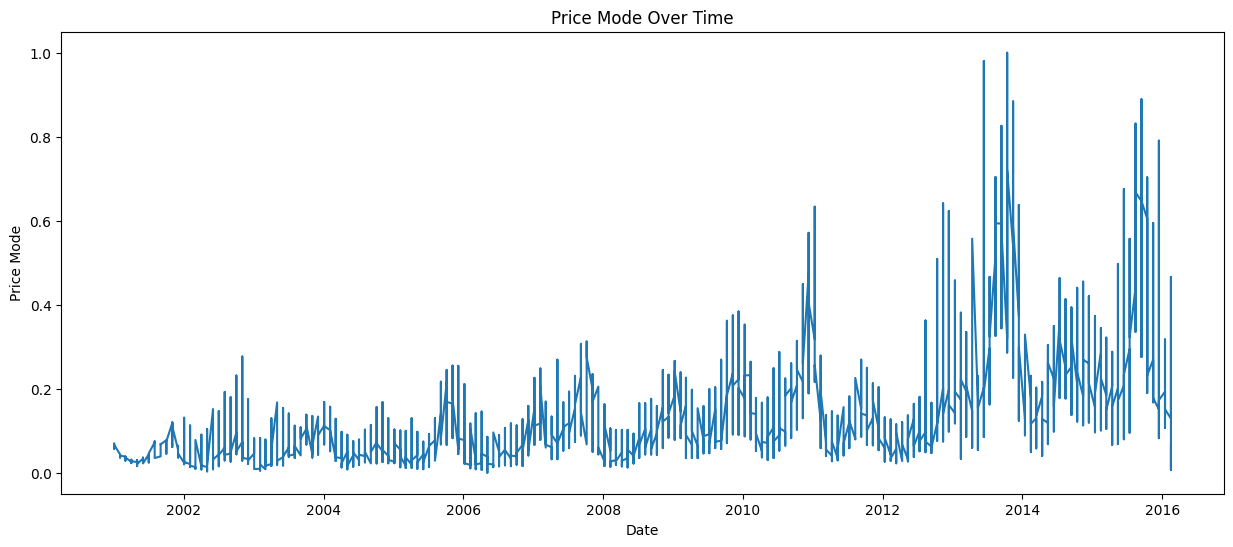

In [95]:
plt.figure(figsize=(15, 6))
plt.plot(df_scaled['datetime'], df_scaled['priceMod'])
plt.title('Price Mode Over Time')
plt.xlabel('Date')
plt.ylabel('Price Mode')
plt.show()

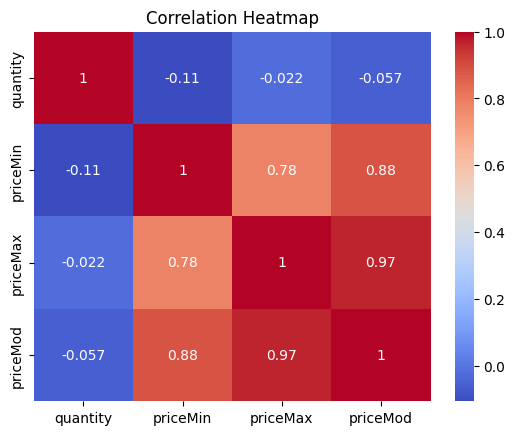

In [96]:
corr = df_scaled[['quantity', 'priceMin', 'priceMax', 'priceMod']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#Feature engineering

In [111]:
df_scaled['priceMod_lag1'] = df_scaled.groupby('market')['priceMod'].shift(1)
df_scaled['priceMod_lag3'] = df_scaled.groupby('market')['priceMod'].shift(3)
df_scaled['priceMod_lag6'] = df_scaled.groupby('market')['priceMod'].shift(6)
df_scaled['priceMod_rolling_mean3'] = df_scaled.groupby('market')['priceMod'].rolling(window=3).mean().reset_index(0, drop=True)
df_scaled['priceMod_rolling_mean6'] = df_scaled.groupby('market')['priceMod'].rolling(window=6).mean().reset_index(0, drop=True)
df_scaled['month'] = df_scaled['datetime'].dt.month
df_scaled['quarter'] = df_scaled['datetime'].dt.quarter


df_scaled

,market,quantity,priceMin,priceMax,priceMod,state,city,datetime,priceMod_lag1,priceMod_lag3,priceMod_lag6,priceMod_rolling_mean3,priceMod_rolling_mean6,month,quarter
6061,73,0.018959,0.046457,0.045110,0.059177,5,70,2001-01-01,NaN,NaN,NaN,NaN,NaN,1,1
6436,76,0.092583,0.038770,0.046477,0.060601,14,73,2001-01-01,NaN,NaN,NaN,NaN,NaN,1,1
5404,68,0.180240,0.033924,0.049708,0.065506,14,65,2001-01-01,NaN,NaN,NaN,NaN,NaN,1,1
8614,101,0.015500,0.046290,0.047595,0.062184,14,98,2001-01-01,NaN,NaN,NaN,NaN,NaN,1,1
1579,21,0.046520,0.037266,0.051821,0.057120,14,21,2001-01-01,NaN,NaN,NaN,NaN,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9380,108,0.013024,0.016544,0.073816,0.088133,14,105,2016-02-16,0.054747,0.065823,0.283861,0.108439,0.086050,2,1
9395,108,0.007448,0.021223,0.106624,0.099367,14,105,2016-02-16,0.088133,0.182437,0.074842,0.080749,0.090137,2,1
9396,108,0.009506,0.033924,0.133466,0.147627,14,105,2016-02-16,0.099367,0.054747,0.050316,0.111709,0.106355,2,1
9397,108,0.031363,0.013703,0.022120,0.031804,14,105,2016-02-16,0.147627,0.088133,0.065823,0.092932,0.100686,2,1


In [113]:
for col in ['priceMod_lag1', 'priceMod_lag3', 'priceMod_lag6', 'priceMod_rolling_mean3', 'priceMod_rolling_mean6']:
    df_scaled[col].fillna(df_scaled[col].mean(), inplace=True)


df_featured=df_scaled
df_featured

,market,quantity,priceMin,priceMax,priceMod,state,city,datetime,priceMod_lag1,priceMod_lag3,priceMod_lag6,priceMod_rolling_mean3,priceMod_rolling_mean6,month,quarter
6061,73,0.018959,0.046457,0.045110,0.059177,5,70,2001-01-01,0.142536,0.140707,0.133040,0.142523,0.141452,1,1
6436,76,0.092583,0.038770,0.046477,0.060601,14,73,2001-01-01,0.142536,0.140707,0.133040,0.142523,0.141452,1,1
5404,68,0.180240,0.033924,0.049708,0.065506,14,65,2001-01-01,0.142536,0.140707,0.133040,0.142523,0.141452,1,1
8614,101,0.015500,0.046290,0.047595,0.062184,14,98,2001-01-01,0.142536,0.140707,0.133040,0.142523,0.141452,1,1
1579,21,0.046520,0.037266,0.051821,0.057120,14,21,2001-01-01,0.142536,0.140707,0.133040,0.142523,0.141452,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9380,108,0.013024,0.016544,0.073816,0.088133,14,105,2016-02-16,0.054747,0.065823,0.283861,0.108439,0.086050,2,1
9395,108,0.007448,0.021223,0.106624,0.099367,14,105,2016-02-16,0.088133,0.182437,0.074842,0.080749,0.090137,2,1
9396,108,0.009506,0.033924,0.133466,0.147627,14,105,2016-02-16,0.099367,0.054747,0.050316,0.111709,0.106355,2,1
9397,108,0.031363,0.013703,0.022120,0.031804,14,105,2016-02-16,0.147627,0.088133,0.065823,0.092932,0.100686,2,1


#Model Training

###Preparing data

In [115]:
X = df_featured.drop(['priceMod', 'datetime', 'priceMin', 'priceMax'], axis=1)
y = df_featured['priceMod']
df_featured

,market,quantity,priceMin,priceMax,priceMod,state,city,datetime,priceMod_lag1,priceMod_lag3,priceMod_lag6,priceMod_rolling_mean3,priceMod_rolling_mean6,month,quarter
6061,73,0.018959,0.046457,0.045110,0.059177,5,70,2001-01-01,0.142536,0.140707,0.133040,0.142523,0.141452,1,1
6436,76,0.092583,0.038770,0.046477,0.060601,14,73,2001-01-01,0.142536,0.140707,0.133040,0.142523,0.141452,1,1
5404,68,0.180240,0.033924,0.049708,0.065506,14,65,2001-01-01,0.142536,0.140707,0.133040,0.142523,0.141452,1,1
8614,101,0.015500,0.046290,0.047595,0.062184,14,98,2001-01-01,0.142536,0.140707,0.133040,0.142523,0.141452,1,1
1579,21,0.046520,0.037266,0.051821,0.057120,14,21,2001-01-01,0.142536,0.140707,0.133040,0.142523,0.141452,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9380,108,0.013024,0.016544,0.073816,0.088133,14,105,2016-02-16,0.054747,0.065823,0.283861,0.108439,0.086050,2,1
9395,108,0.007448,0.021223,0.106624,0.099367,14,105,2016-02-16,0.088133,0.182437,0.074842,0.080749,0.090137,2,1
9396,108,0.009506,0.033924,0.133466,0.147627,14,105,2016-02-16,0.099367,0.054747,0.050316,0.111709,0.106355,2,1
9397,108,0.031363,0.013703,0.022120,0.031804,14,105,2016-02-16,0.147627,0.088133,0.065823,0.092932,0.100686,2,1


In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [116]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [117]:
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
sarima_model = train_sarima(df_featured)
sarima_forecast = sarima_model.forecast(steps=len(y_test))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is av

In [118]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"{model_name} Performance:")
    print(f"MSE: {mse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R2 Score: {r2:.2f}")

evaluate_model(y_test, rf_predictions, "Random Forest")
evaluate_model(y_test, sarima_forecast, "SARIMA")

Random Forest Performance:
MSE: 0.00
MAE: 0.02
RMSE: 0.03
R2 Score: 0.93
SARIMA Performance:
MSE: 0.03
MAE: 0.14
RMSE: 0.16
R2 Score: -0.51


In [107]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.7 MB/s eta 0:00:00


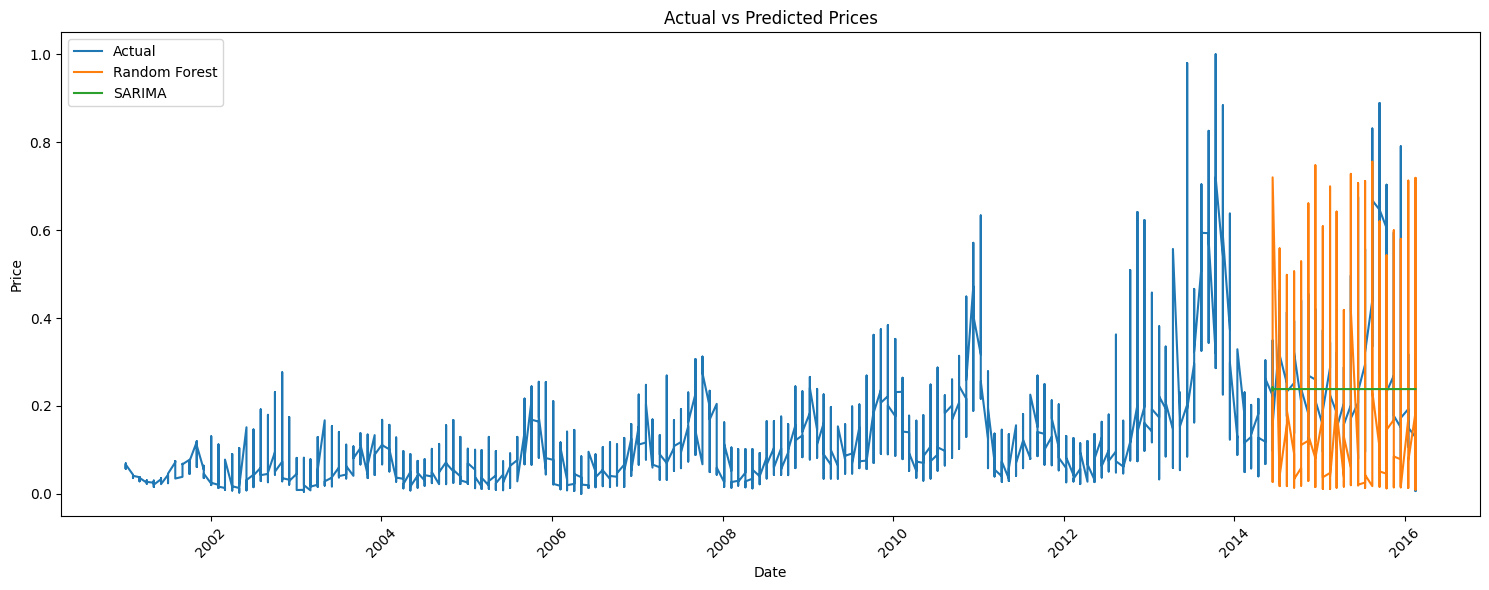

In [121]:

plt.figure(figsize=(15, 6))
plt.plot(df_featured['datetime'], df_featured['priceMod'], label='Actual')

# Assuming 'rf_predictions' corresponds to the test set 'X_test',
# we need to extract the corresponding datetime values
plt.plot(df_featured['datetime'].iloc[-len(rf_predictions):], rf_predictions, label='Random Forest')

plt.plot(df_featured['datetime'].iloc[-len(sarima_forecast):], sarima_forecast, label='SARIMA') # Similar adjustment for SARIMA
plt.title('Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import pmdarima as pm

# Find the optimal SARIMA parameters
sarimax_model = pm.auto_arima(df_featured['priceMod'], seasonal=True, m=12, suppress_warnings=True, stepwise=True)
print(f"Optimal SARIMA parameters: {sarimax_model.order}, {sarimax_model.seasonal_order}")

# Fit the SARIMA model
sarima_model = SARIMAX(df_featured['priceMod'], order=sarimax_model.order, seasonal_order=sarimax_model.seasonal_order)
sarima_results = sarima_model.fit()

# Generate future predictions
future_steps = 12
future_dates = pd.date_range(start=df_featured['datetime'].iloc[-1] + pd.Timedelta(days=1), periods=future_steps, freq='M')
future_predictions = sarima_results.forecast(steps=future_steps)

# Create a new DataFrame for the future predictions
future_df = pd.DataFrame({'datetime': future_dates, 'priceMod_forecast': future_predictions})

# Visualize the historical data and future predictions
plt.figure(figsize=(15, 6))
plt.plot(df_featured['datetime'], df_featured['priceMod'], label='Historical Data')
plt.plot(future_df['datetime'], future_df['priceMod_forecast'], label='Future Predictions', color='red')
plt.title('Historical Data and Future Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the future predictions
print("Future Predictions:")
for date, price in zip(future_df['datetime'], future_df['priceMod_forecast']):
    print(f"{date.strftime('%Y-%m-%d')}: {price:.2f}")